# Datenanalyse mit pandas und seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import seaborn as sns

Einlesen einer CSV-Datei.

In [ ]:
dat = pd.read_csv("Daten/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv", sep=",") 

Verschaffen wir uns erst einmal einen Überblick über die ersten und letzten Zeilen der Tabelle.

In [3]:
dat.head(9)

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3
5,2010,All Races,Both Sexes,78.7,747.0
6,2009,All Races,Both Sexes,78.5,749.6
7,2008,All Races,Both Sexes,78.2,774.9
8,2007,All Races,Both Sexes,78.1,775.3


In [4]:
dat.tail()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
1039,1904,White,Male,46.6,2630.5
1040,1903,White,Male,49.5,2494.2
1041,1902,White,Male,50.2,2430.1
1042,1901,White,Male,48.0,2582.3
1043,1900,White,Male,46.6,2613.2


Welche Spalten gibt es?

In [5]:
dat.columns

Index(['Year', 'Race', 'Sex', 'Average Life Expectancy (Years)',
       'Age-adjusted Death Rate'],
      dtype='object')

In [6]:
dat.describe()

,Year,Average Life Expectancy (Years),Age-adjusted Death Rate
count,1044.00000,1035.000000,1044.000000
mean,1957.50000,64.117295,1614.076820
std,33.50112,11.786490,678.013357
min,1900.00000,29.100000,616.700000
25%,1928.75000,56.600000,1040.250000
50%,1957.50000,66.600000,1541.400000
75%,1986.25000,73.600000,2073.025000
max,2015.00000,81.400000,3845.700000


In [7]:
dat.mean()

Year                               1957.500000
Average Life Expectancy (Years)      64.117295
Age-adjusted Death Rate            1614.076820
dtype: float64

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 5 columns):
Year                               1044 non-null int64
Race                               1044 non-null object
Sex                                1044 non-null object
Average Life Expectancy (Years)    1035 non-null float64
Age-adjusted Death Rate            1044 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 40.9+ KB


In [9]:
dat.groupby(["Race","Sex"]).describe()

Age-adjusted Death Rate                                   \
                                       count         mean         std     min   
Race      Sex                                                                   
All Races Both Sexes                   116.0  1477.929310  553.975271   724.6   
          Female                       116.0  1305.069828  569.495503   616.7   
          Male                         116.0  1682.723276  520.252672   855.1   
Black     Both Sexes                   116.0  1880.958621  780.511865   849.3   
          Female                       116.0  1694.454310  822.298999   710.8   
          Male                         116.0  2112.931897  716.988939  1034.0   
White     Both Sexes                   116.0  1446.911207  545.138269   725.4   
          Female                       116.0  1275.183621  559.600252   617.6   
          Male                         116.0  1650.529310  512.954612   853.4   

                                                           \
                           25%      50%       75%     max   
Race      Sex                                               
All Races Both Sexes   977.575  1336.45  1970.150  2541.6   
          Female       777.975  1113.60  1870.450  2410.4   
          Male        1258.625  1611.65  2118.300  2740.5   
Black     Both Sexes  1246.425  1561.25  2549.125  3586.2   
          Female       978.875  1336.20  2489.600  3362.4   
          Male        1626.825  1861.05  2690.825  3845.7   
White     Both Sexes   951.400  1310.15  1917.575  2501.2   
          Female       758.450  1085.85  1810.875  2394.0   
          Male        1226.750  1587.25  2054.875  2680.7   

                     Average Life Expectancy (Years)              ...    \
                                               count       mean   ...     
Race      Sex                                                     ...     
All Races Both Sexes                           115.0  66.546957   ...     
          Female                               115.0  69.199130   ...     
          Male                                 115.0  64.015652   ...     
Black     Both Sexes                           115.0  58.354783   ...     
          Female                               115.0  60.962609   ...     
          Male                                 115.0  55.788696   ...     
White     Both Sexes                           115.0  67.340000   ...     
          Female                               115.0  70.044348   ...     
          Male                                 115.0  64.803478   ...     

                                    Year                                      \
                        75%   max  count    mean        std     min      25%   
Race      Sex                                                                  
All Races Both Sexes  74.70  78.9  116.0  1957.5  33.630343  1900.0  1928.75   
          Female      78.20  81.3  116.0  1957.5  33.630343  1900.0  1928.75   
          Male        71.15  76.5  116.0  1957.5  33.630343  1900.0  1928.75   
Black     Both Sexes  69.10  75.6  116.0  1957.5  33.630343  1900.0  1928.75   
          Female      73.40  78.5  116.0  1957.5  33.630343  1900.0  1928.75   
          Male        64.60  72.5  116.0  1957.5  33.630343  1900.0  1928.75   
White     Both Sexes  75.35  79.1  116.0  1957.5  33.630343  1900.0  1928.75   
          Female      78.75  81.4  116.0  1957.5  33.630343  1900.0  1928.75   
          Male        71.85  76.7  116.0  1957.5  33.630343  1900.0  1928.75   

                                               
                         50%      75%     max  
Race      Sex                                  
All Races Both Sexes  1957.5  1986.25  2015.0  
          Female      1957.5  1986.25  2015.0  
          Male        1957.5  1986.25  2015.0  
Black     Both Sexes  1957.5  1986.25  2015.0  
          Female      1957.5  1986.25  2015.0  
          Male        1957.5  1986.25  2015.0  
White     Both Sexes 

In [10]:
datGrouped = dat.groupby(["Race","Sex"])

('All Races', 'Both Sexes')
('All Races', 'Female')
('All Races', 'Male')
('Black', 'Both Sexes')
('Black', 'Female')
('Black', 'Male')
('White', 'Both Sexes')
('White', 'Female')
('White', 'Male')


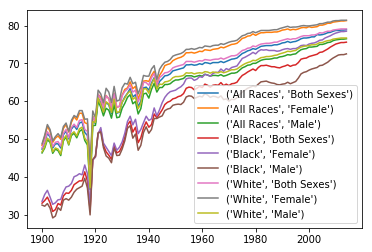

In [11]:
fig, ax = plt.subplots()
lbls = []
for groupname in datGrouped.groups:
    print(groupname)
    group = datGrouped.get_group(groupname)
    t = group["Year"]
    y = group["Average Life Expectancy (Years)"]
    lbls.append(groupname)
    ax.plot(t,y)
ax.legend(lbls)
plt.show()

## Beispiel: Städte der Welt

In [12]:
df_cities = pd.read_csv("Daten/world-cities.csv")

In [13]:
df_cities.head()

,name,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594
3,Ras al-Khaimah,United Arab Emirates,Raʼs al Khaymah,291074
4,Khawr Fakkān,United Arab Emirates,Ash Shāriqah,291696


Wieviele Städte in welchem Land?

In [25]:
df_cities["country"].value_counts()[:10]

United States    2699
India            2443
Brazil           1200
Russia           1093
Germany          1055
China             799
Japan             736
France            633
Italy             571
Spain             569
Name: country, dtype: int64

### Extrahiere deutsche Städte

In [19]:
cities_de = df_cities[df_cities["country"] == "Germany"]
cities_de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 4303 to 5357
Data columns (total 4 columns):
name          1055 non-null object
country       1055 non-null object
subcountry    1055 non-null object
geonameid     1055 non-null int64
dtypes: int64(1), object(3)
memory usage: 41.2+ KB


In [20]:
cities_de.head()

,name,country,subcountry,geonameid
4303,Zwickau,Germany,Saxony,2803560
4304,Zweibrücken,Germany,Rheinland-Pfalz,2803620
4305,Zulpich,Germany,North Rhine-Westphalia,2803723
4306,Zossen,Germany,Brandenburg,2803870
4307,Zittau,Germany,Saxony,2804008


### Städte nach Bundesländern

In [22]:
cities_by_state = cities_de["subcountry"].value_counts()

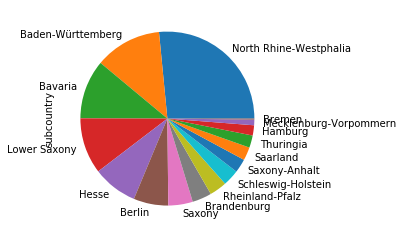

In [24]:
cities_by_state.plot(kind="pie")